In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data=pd.read_csv("../data/pokemon.csv")
data.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [22]:
data.insert(0,'name',data.pop('name'))
data.info

<bound method DataFrame.info of            name                    abilities  against_bug  against_dark  \
0     Bulbasaur  ['Overgrow', 'Chlorophyll']         1.00           1.0   
1       Ivysaur  ['Overgrow', 'Chlorophyll']         1.00           1.0   
2      Venusaur  ['Overgrow', 'Chlorophyll']         1.00           1.0   
3    Charmander     ['Blaze', 'Solar Power']         0.50           1.0   
4    Charmeleon     ['Blaze', 'Solar Power']         0.50           1.0   
..          ...                          ...          ...           ...   
796  Celesteela              ['Beast Boost']         0.25           1.0   
797     Kartana              ['Beast Boost']         1.00           1.0   
798    Guzzlord              ['Beast Boost']         2.00           0.5   
799    Necrozma              ['Prism Armor']         2.00           2.0   
800    Magearna               ['Soul-Heart']         0.25           0.5   

     against_dragon  against_electric  against_fairy  against_fight

In [23]:
data.isnull().sum()

name                   0
abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


In [24]:
data['type2'].fillna('None',inplace=True), #replacing empty type2 cells with none
data['percentage_male'].fillna('None', inplace=True)
mean_h=data['height_m'].mean()
mean_w=data['weight_kg'].mean()
data['height_m'].fillna(mean_h, inplace=True)
data['weight_kg'].fillna(mean_w, inplace=True)


C:\Users\Karim\AppData\Local\Temp\ipykernel_39144\2588877425.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['type2'].fillna('None',inplace=True), #replacing empty type2 cells with none
C:\Users\Karim\AppData\Local\Temp\ipykernel_39144\2588877425.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

In [25]:
data.isnull().sum()

name                 0
abilities            0
against_bug          0
against_dark         0
against_dragon       0
against_electric     0
against_fairy        0
against_fight        0
against_fire         0
against_flying       0
against_ghost        0
against_grass        0
against_ground       0
against_ice          0
against_normal       0
against_poison       0
against_psychic      0
against_rock         0
against_steel        0
against_water        0
attack               0
base_egg_steps       0
base_happiness       0
base_total           0
capture_rate         0
classfication        0
defense              0
experience_growth    0
height_m             0
hp                   0
japanese_name        0
percentage_male      0
pokedex_number       0
sp_attack            0
sp_defense           0
speed                0
type1                0
type2                0
weight_kg            0
generation           0
is_legendary         0
dtype: int64

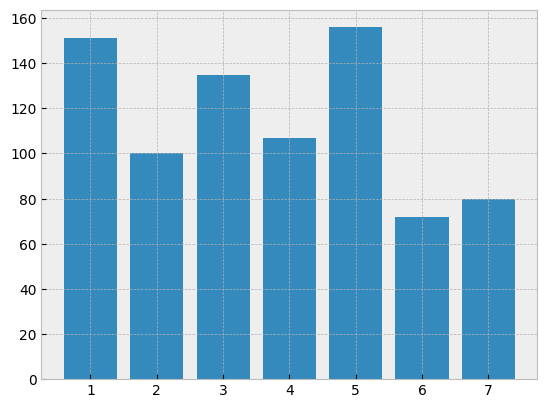

type2
None        384
flying       95
poison       34
ground       34
fairy        29
psychic      29
fighting     25
steel        22
dark         21
grass        20
water        17
dragon       17
ice          15
ghost        14
rock         14
fire         13
electric      9
bug           5
normal        4
Name: count, dtype: int64


<Figure size 1200x600 with 0 Axes>

In [36]:
#section for general stats
#Amount per Gen
gens =data.generation.value_counts()
plt.bar(gens.index, gens.values)
plt.show()


#Amount double types
db= data.type2.value_counts()
print(db)

types1 = data.type1.value_counts()
types2 = data.type2.value_counts()
#print(types1)
#print(types2)

plt.figure(figsize=(12, 6))

plt.show()

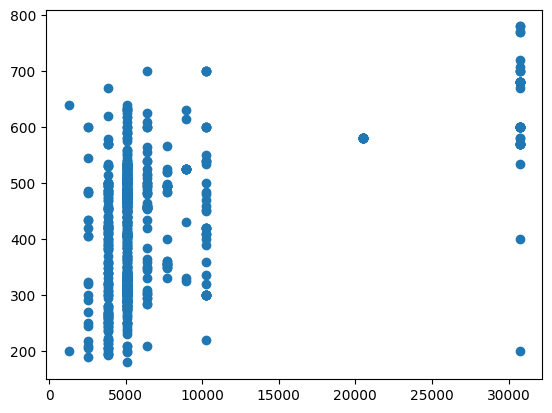

In [61]:
#
#base egg stepsvs vs total base stats
bes_array=data.base_egg_steps.values
bt = data.base_total.values
plt.plot(bes_array,bt,'o')
plt.show()



['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


C:\Users\Karim\AppData\Local\Temp\ipykernel_39144\139342687.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(hp_values, labels=types, patch_artist=True)


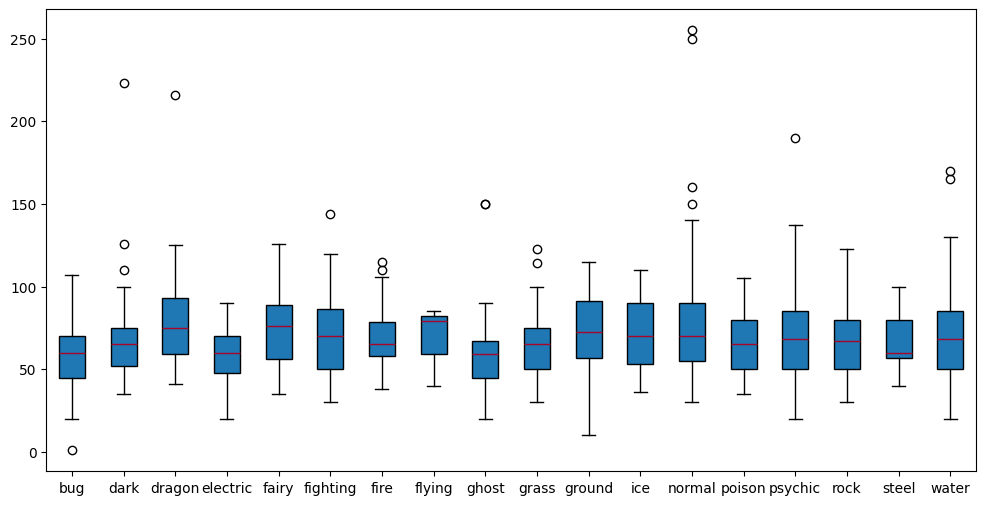

In [12]:
hp_type = data.groupby('type1')['hp'].apply(list)

types = hp_type.index.tolist()
hp_values = hp_type.values.tolist()

plt.figure(figsize=(12, 6))
plt.boxplot(hp_values, labels=types, patch_artist=True)
print(plt.style.available)
plt.style.use('bmh')
plt.show()

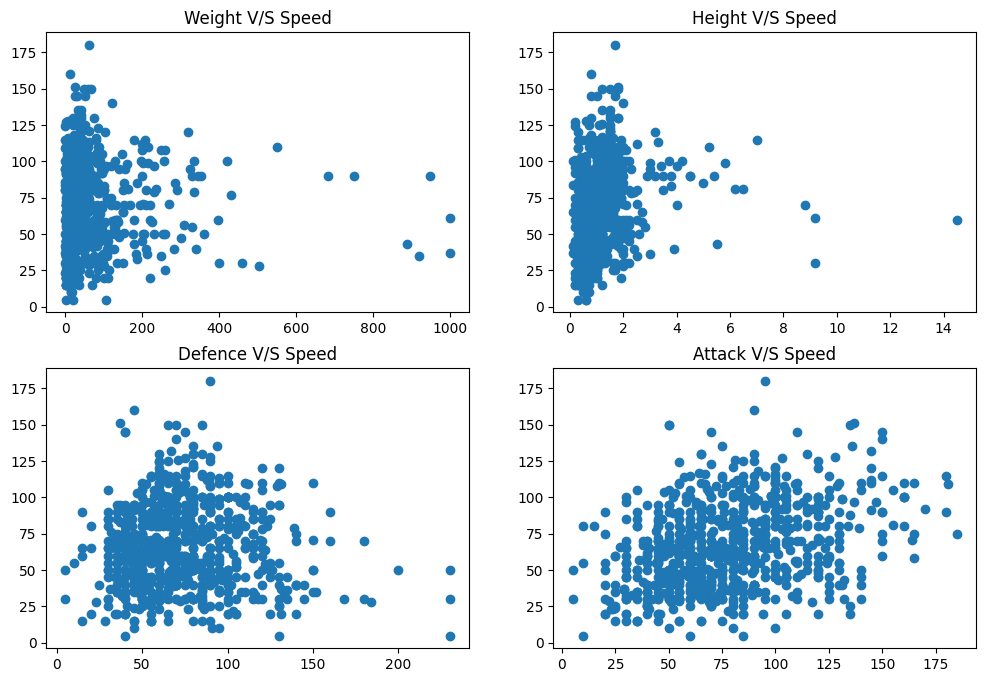

In [8]:
speed=data.speed.values
weight=data.weight_kg.values
height=data.height_m.values
defence=data.defense.values
attack=data.attack.values

figure, axis = plt.subplots(2,2, figsize=(12, 8))



axis[0,0].plot(weight,speed,'o')
axis[0,0].set_title("Weight V/S Speed")


axis[0,1].plot(height,speed,'o')
axis[0,1].set_title("Height V/S Speed")

axis[1,0].plot(defence,speed,'o')
axis[1,0].set_title("Defence V/S Speed")

axis[1,1].plot(attack,speed,'o')
axis[1,1].set_title("Attack V/S Speed")


plt.show()

In [ ]:
types_sp= data.groupby(['type1']).agg)(
    avg_speed=('speed','mean')
)

print(types)